In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt



In [214]:
database = './database.sqlite'
conn = sqlite3.connect(database)

In [8]:
# function to read SQL file
def readSQL(query):
    output = pd.read_sql(query,conn)
    return output


## 1. Check tables and names

In [215]:
query = """SELECT * FROM sqlite_master WHERE type='table'"""
tables = readSQL(query)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


## 2. Queries to generate tables of interest

In [216]:
query = """select count(*) from Player;"""
countries = readSQL(query)
countries

,count(*)
0,11060


In [217]:
query = """SELECT Match.id, 
Country.name AS country_name, 
League.name AS league_name, 
season, 
stage, 
date,
HT.team_long_name AS  home_team,
AT.team_long_name AS away_team,
home_team_goal, 
away_team_goal                                        
FROM Match
JOIN Country on Country.id = Match.country_id
JOIN League on League.id = Match.league_id
LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
WHERE home_team = 'Manchester United' or away_team = 'Manchester United'
ORDER by date
desc
LIMIT 10;"""
deatiled_matches = readSQL(query)
deatiled_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,4702,England,England Premier League,2015/2016,38,2016-05-17 00:00:00,Manchester United,Bournemouth,3,1
1,4678,England,England Premier League,2015/2016,35,2016-05-10 00:00:00,West Ham United,Manchester United,3,2
2,4695,England,England Premier League,2015/2016,37,2016-05-07 00:00:00,Norwich City,Manchester United,0,1
3,4682,England,England Premier League,2015/2016,36,2016-05-01 00:00:00,Manchester United,Leicester City,1,1
4,4624,England,England Premier League,2015/2016,30,2016-04-20 00:00:00,Manchester United,Crystal Palace,2,0
5,4664,England,England Premier League,2015/2016,34,2016-04-16 00:00:00,Manchester United,Aston Villa,1,0
6,4656,England,England Premier League,2015/2016,33,2016-04-10 00:00:00,Tottenham Hotspur,Manchester United,3,0
7,4644,England,England Premier League,2015/2016,32,2016-04-03 00:00:00,Manchester United,Everton,1,0
8,4632,England,England Premier League,2015/2016,31,2016-03-20 00:00:00,Manchester City,Manchester United,0,1
9,4608,England,England Premier League,2015/2016,29,2016-03-06 00:00:00,West Bromwich Albion,Manchester United,1,0


## 3. Extract player information


In [218]:
query = """select * from Player;"""
players = readSQL(query)
players

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [31]:
players = pd.DataFrame(players)


0        182.88
1        170.18
2        170.18
3        182.88
4        182.88
          ...  
11055    182.88
11056    182.88
11057    180.34
11058    185.42
11059    180.34
Name: height, Length: 11060, dtype: float64


## 3.1 Generate QQplot for height and weight

Text(0.5, 1.0, 'Players Weight')

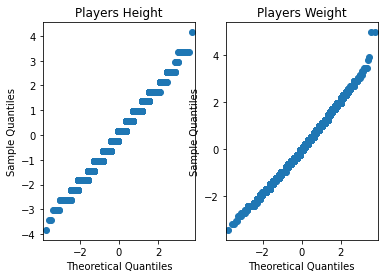

In [33]:
from scipy import stats as stats
import statsmodels.api as sm
import pylab as py
fig, (ax1,ax2) = plt.subplots(1,2)

p_height = players['height']
sm.qqplot(p_height,fit = True,ax = ax1)
ax1.set_title('Players Height')

p_weight = players['weight']
sm.qqplot(p_weight, fit = True, ax = ax2)
ax2.set_title('Players Weight')

## 3.2 players' height, weight vs ratings


In [224]:
query = """select height as height, weight as weight,
round(avg(overall_rating)) as average_rating,
CASE
when ROUND(avg(PA.overall_rating)) <= 65 then 'poor'
when ROUND(avg(PA.overall_rating)) < 80 then 'medium'
else  'good'
end as rating
from Player
left join Player_attributes PA on PA.player_api_id = player.player_api_id 
group by PA.player_api_id
order by average_rating
"""
stats = readSQL(query)
stats

,height,weight,average_rating,rating
0,180.34,154,43.0,poor
1,175.26,139,44.0,poor
2,180.34,176,45.0,poor
3,175.26,150,45.0,poor
4,175.26,157,46.0,poor
...,...,...,...,...
11055,170.18,150,88.0,good
11056,195.58,209,88.0,good
11057,170.18,148,88.0,good
11058,185.42,176,91.0,good


In [225]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# stats_norm = scaler.fit_transform(stats)
# stats_norm = pd.DataFrame(stats_norm)


Text(0, 0.5, 'weight')

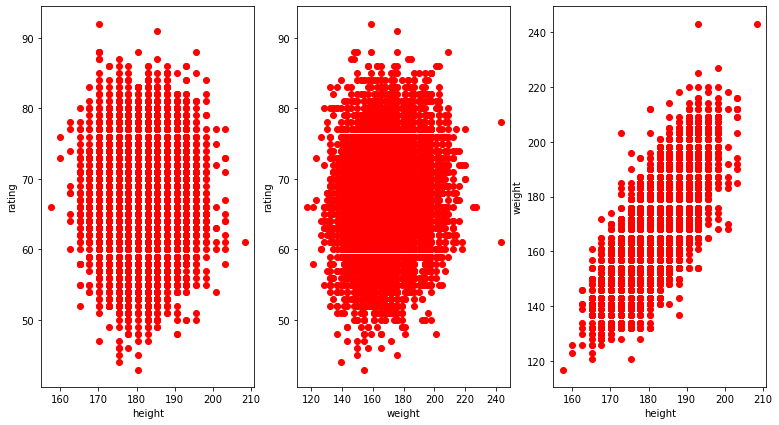

In [241]:

# fig, ax = plt.subplots(1,3)
# stats_norm = stats_norm.rename(columns = {0:'height',1:'weight',2:'average_rating'})
plt.figure(figsize = (13,7))
height = stats['height']
weight = stats['weight']
rating = stats['average_rating']

plt.subplot(1,3,1)
plt.plot(height,rating,'ro')
plt.xlabel('height')
plt.ylabel('rating')

plt.subplot(1,3,2)
plt.plot(weight,rating,'ro')
plt.xlabel('weight')
plt.ylabel('rating')

plt.subplot(1,3,3)
plt.plot(height,weight,'ro')
plt.xlabel('height')
plt.ylabel('weight')

#### height/weight doesn't seem to be correlated to rating/performance

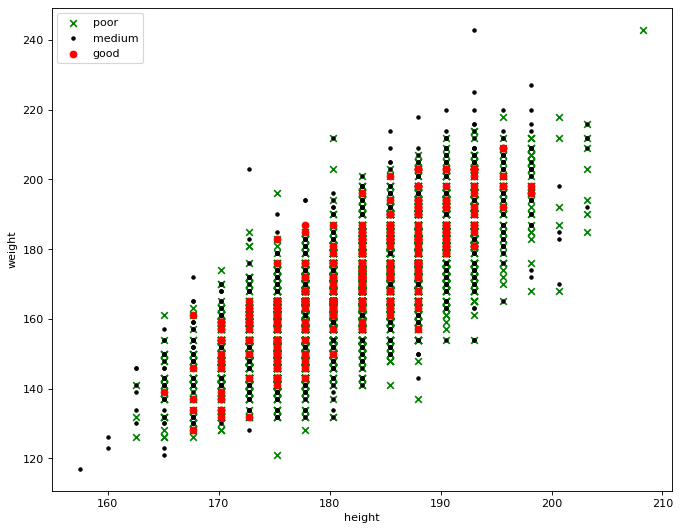

In [245]:
plt.figure(figsize=(10,8), dpi=80)
def plot_scatter(x,y,labels,colors,marker):
    for i in range(len(colors)):
        px = x['height'][y == labels[i]]
        py = x['weight'][y == labels[i]]
        plt.scatter(px,py, c = colors[i],marker = marker[i])
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.legend(['poor','medium','good'])
    plt.show()

colors = ['green','black','red']
marker = ['x','.','o']
plot_scatter(stats,stats['rating'],['poor','medium','good'],colors,marker)

#### all classes of players could be fitted in the same pattern. ps: includes goalkeeper data. There are, however, ideal weight given certain height. Players who are too slim/not strong enough are not classified as good players.

## 4. Goalkeepers' information

In [142]:
query = """select CASE
when ROUND(avg(overall_rating)) <= 65 then 'poor'
when ROUND(avg(overall_rating)) <= 79  then 'medium'
else 'good'
end as rating,
round(avg(overall_rating)) as average_rating,
round(avg(gk_diving)) as diving,
round(avg(gk_handling)) as handling,
round(avg(gk_kicking))as kicking,
round(avg(gk_positioning))as positioning,
round(avg(gk_reflexes))as replexes
from player_attributes
where gk_diving > 50 
group by player_api_id
order by average_rating desc
"""
keeper = readSQL(query)
keeper

,rating,average_rating,diving,handling,kicking,positioning,replexes
0,good,87.0,90.0,82.0,69.0,84.0,91.0
1,good,86.0,88.0,82.0,68.0,90.0,84.0
2,good,86.0,86.0,82.0,86.0,83.0,86.0
3,good,85.0,86.0,83.0,76.0,85.0,87.0
4,good,85.0,83.0,85.0,78.0,86.0,87.0
...,...,...,...,...,...,...,...
956,poor,50.0,55.0,48.0,46.0,45.0,55.0
957,poor,50.0,53.0,43.0,46.0,49.0,55.0
958,poor,50.0,63.0,49.0,57.0,47.0,43.0
959,poor,50.0,54.0,47.0,56.0,49.0,48.0


## 4.1 corrrelation between different features

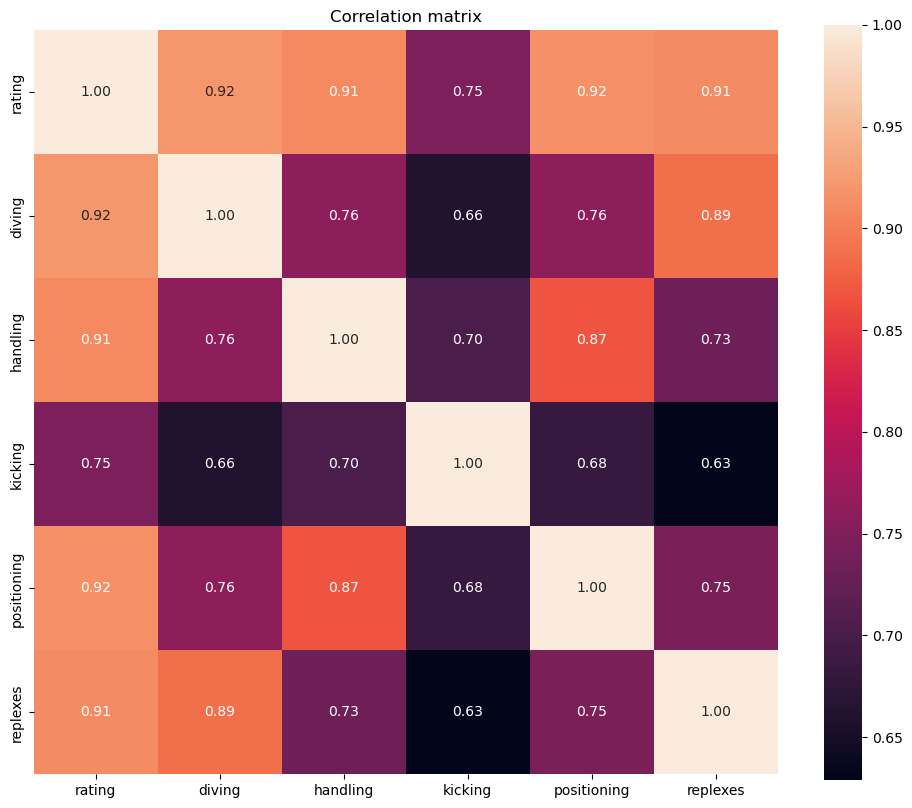

In [104]:
import seaborn as sns
# scaler = MinMaxScaler()
# keeper_s = scaler.fit_transform(keeper)
# keeper_s = pd.DataFrame(keeper_s)
plt.figure(figsize=(12,10),dpi = 100)
plt.title('Correlation matrix')
ax = sns.heatmap(keeper.corr(), square=True, annot=True, fmt='.2f', linecolor='white')       
plt.show()

#### kicking is least correlated with other features. All other features are highly correlated with rating score of goalkeeper. 

## 4.2 PCA to reduce dimensions

In [207]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(keeper.iloc[:,2::])
var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 3))
print(var)
print(pca_data)

[0.795 0.882]
[[-37.3318468   12.55119383]
 [-35.91812743   9.13855039]
 [-40.19249733  -4.73508737]
 ...
 [ 33.44867204  -9.00278747]
 [ 35.39550632  -8.89703668]
 [ 42.64288924   7.00521538]]


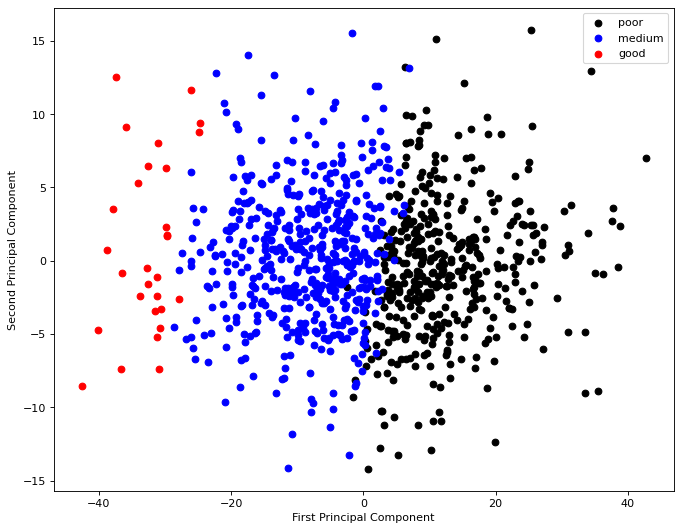

In [208]:
plt.figure(figsize=(10,8), dpi=80)
def plot_pca_scatter(X,y,labels,colors):
    for i in range(len(colors)):
        px = X[:,0][y == labels[i]]
        py = X[:,1][y == labels[i]]
        plt.scatter(px, py, c=colors[i])
    plt.legend(labels)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
colors = ['black', 'blue','red']  
plot_pca_scatter(pca_data,keeper['rating'],['poor', 'medium','good'], colors)

## 4.3 PCA biplot

In [209]:
# standardize data before PCA
scaler = MinMaxScaler()
keeper_s = scaler.fit_transform(keeper.iloc[:,2::])
keeper_s = pd.DataFrame(keeper_s)
pca = PCA(n_components = 2)
pca_d = pca.fit_transform(keeper.iloc[:,2::])


In [210]:
# transfer player attribute into color for scatter plot
color = []
for i in range(len(keeper)):
    if keeper.iloc[i,0] == 'poor':
        color.append('black') 
    elif keeper.iloc[i,0] == 'medium':
        color.append('blue')
    else:
        color.append('red')


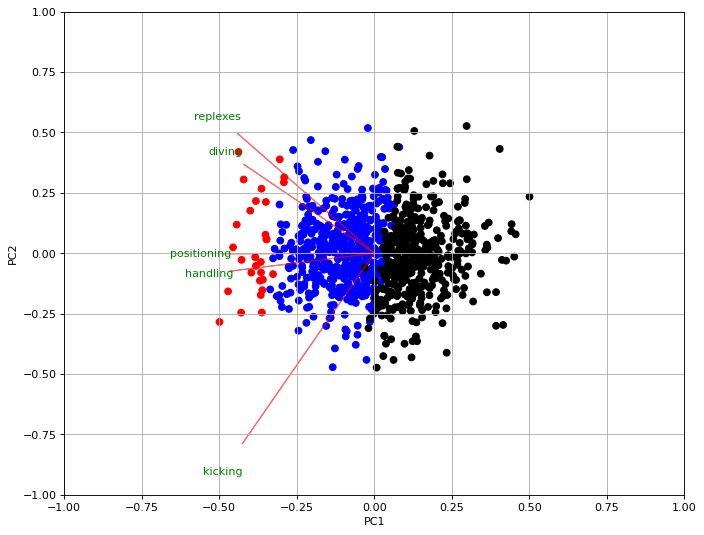

In [213]:
plt.figure(figsize=(10,8), dpi=80)
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = color)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
labels = list(keeper.columns)
myplot(pca_d,np.transpose(pca.components_),labels[2::])
plt.show()

#### Kicking contribute most to PC2. Kicking seems to not correlation with reflexes. Positioning and handling contribute the most to PC1. Different class of players are distinguished by PC1 which is mainly determined by handling and positioning. 